In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [174]:
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



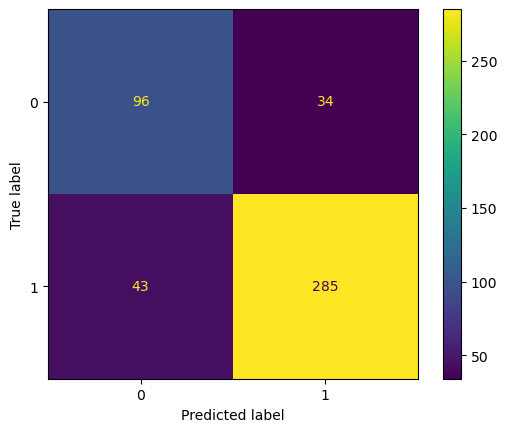

In [175]:
plot_confusion_matrix(model_GB, X_test, y_test)

In [180]:
# AUC and ROC curve for test set

AUC: 0.904


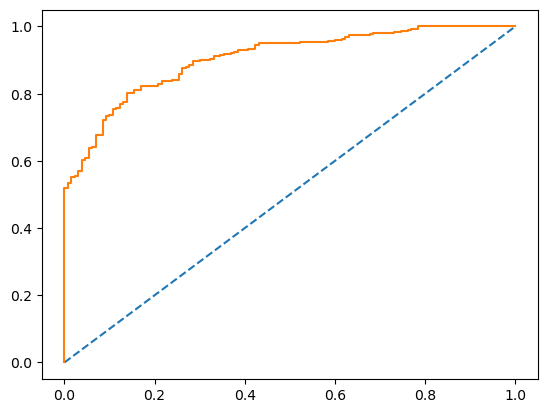

In [176]:
probs = model_GB.predict_proba(X_test)
probs = probs[:,1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:<br>

1.)President Franklin D. Roosevelt in 1941<br>
2.)President John F. Kennedy in 1961<br>
3.)President Richard Nixon in 1973<br>

In [182]:
import nltk
import re
import string
from nltk.corpus import inaugural

In [183]:
inaug = pd.read_excel('Project_Speech.xlsx')

In [184]:
inaug

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [185]:
inaug.shape

(3, 2)

### Number of words

In [186]:
inaug['Number_of_words'] = inaug['Speech'].apply(lambda x: len(str(x).split(" ")))

In [187]:
inaug[['Speech','Number_of_words']].head()

,Speech,Number_of_words
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


### Number of characters including spaces

In [188]:
inaug['Number_of_char'] = inaug['Speech'].str.len()
inaug[['Speech','Number_of_char']]

,Speech,Number_of_char
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


### Number of sentences

In [189]:
from nltk.tokenize import sent_tokenize

In [190]:
def count_sent(text):
    sentences = sent_tokenize(text)
    return len(sentences)

In [191]:
inaug['Number_of_sent'] = inaug['Speech'].apply(count_sent)
inaug[['Speech','Number_of_sent']].head()

,Speech,Number_of_sent
0,On each national day of inauguration since 178...,32
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",27
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",20


### Stopwords count

In [192]:
from nltk.corpus import stopwords

In [193]:
stop = stopwords.words('english')
inaug['Stopwords'] = inaug['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
inaug[['Speech','Stopwords']].head()

,Speech,Stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


### Stopwords Removal

In [194]:
inaug['Speech'] = inaug['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
inaug['Speech'].head()

0    On national day inauguration since 1789, peopl...
1    Vice President Johnson, Mr. Speaker, Mr. Chief...
2    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Speech, dtype: object

### Stopwords count after removal

In [195]:
stop = stopwords.words('english')
inaug['Stopwords'] = inaug['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
inaug[['Speech','Stopwords']].head()

,Speech,Stopwords
0,"On national day inauguration since 1789, peopl...",0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


In [196]:
inaug['Speech'].iloc[0]

'On national day inauguration since 1789, people renewed sense dedication United States.\\n\\nIn Washington\\\'s day task people create weld together nation.\\n\\nIn Lincoln\\\'s day task people preserve Nation disruption within.\\n\\nIn day task people save Nation institutions disruption without.\\n\\nTo us come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. If not, risk real peril inaction.\\n\\nLives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live.\\n\\nThere men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide.\\n\\nBut Americans know true.\\n\\nEight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock -- acted. We acted quickly, bo

### Special characters removal

In [197]:
inaug['Speech'] = inaug['Speech'].str.replace('--', "").str.replace('[^\w\s]','').str.replace('nn'," ")

In [198]:
inaug['Speech'].iloc[0]

'On national day inauguration since 1789 people renewed sense dedication United States In Washingtons day task people create weld together natio nIn Lincolns day task people preserve Nation disruption withi nIn day task people save Nation institutions disruption without To us come time midst swift happenings pause moment take stock  recall place history been rediscover may be If not risk real peril inactio nLives nations determined count years lifetime human spirit The life man threescore years ten little more little less The life nation fullness measure live There men doubt this There men believe democracy form Government frame life limited measured kind mystical artificial fate that unexplained reason tyra y slavery become surging wave future  freedom ebbing tide But Americans know true Eight years ago life Republic seemed frozen fatalistic terror proved true We midst shock  acted We acted quickly boldly decisively These later years living years  fruitful years people democracy For b

In [199]:
words = [i for i in ' '.join(inaug['Speech']).split()]

In [200]:
Top_words=pd.DataFrame(data=words, columns=['words'])

In [201]:
Top_words

,words
0,On
1,national
2,day
3,inauguration
4,since
...,...
2367,striving
2368,always
2369,serve
2370,His


In [202]:
Top_words.value_counts()

words      
us             46
world          25
new            25
peace          23
America        23
               ..
frustration     1
fulfillment     1
fullness        1
function        1
inspection      1
Length: 1142, dtype: int64

### Top three words in Roosevelt speech

In [203]:
words_roosevelt = [i for i in ' '.join(inaug['Speech'].iloc[0:1]).split()]

In [204]:
Top_words_roose=pd.DataFrame(data=words_roosevelt, columns=['words_roose'])

In [205]:
Top_words_roose

,words_roose
0,On
1,national
2,day
3,inauguration
4,since
...,...
706,go
707,forward
708,service
709,country


In [206]:
Top_words_roose.value_counts()

words_roose
It             13
We             10
know           10
spirit          9
The             9
               ..
fireif          1
fire            1
finally         1
feed            1
yet             1
Length: 476, dtype: int64

### Top three words in Kennedy's speech

In [207]:
words_ken = [i for i in ' '.join(inaug['Speech'].iloc[1:2]).split()]
Top_words_ken=pd.DataFrame(data=words_ken, columns=['words_ken'])

In [208]:
Top_words_ken.value_counts()

words_ken
us           12
sides         8
Let           8
let           8
world         8
             ..
forum         1
formulate     1
form          1
forget        1
young         1
Length: 498, dtype: int64

In [209]:
words_nix = [i for i in ' '.join(inaug['Speech'].iloc[2:3]).split()]
Top_words_nix=pd.DataFrame(data=words_nix, columns=['words_nix'])

In [210]:
Top_words_nix.value_counts()

words_nix
us           26
peace        19
new          15
world        15
America      14
             ..
engaged       1
engage        1
endure        1
endless       1
young         1
Length: 466, dtype: int64

### Word Cloud for Roosevelt

In [211]:
# from wordcloud import WordCloud

In [212]:
# wcr = inaug['Speech'].iloc[0]

In [213]:
# wordcloud = WordCloud(width = 3000, height = 3000, 
#                 background_color ='black', 
#                 min_font_size = 10, random_state=100).generate(wcr)
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off")
# plt.xlabel('Word Cloud')
# plt.tight_layout(pad = 0) 

# print("Word Cloud for Roosevelt Speech")
# plt.show()

### Word Cloud for Kennedy

In [214]:
# wck = inaug['Speech'].iloc[1]

In [215]:
# wordcloud = WordCloud(width = 3000, height = 3000, 
#                 background_color ='black', 
#                 min_font_size = 10, random_state=100).generate(wck)
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off")
# plt.xlabel('Word Cloud')
# plt.tight_layout(pad = 0) 

# print("Word Cloud for Kennedy Speech")
# plt.show()

### Word Cloud for Nixon

In [216]:
# wcn = inaug['Speech'].iloc[2]

In [217]:
# wordcloud = WordCloud(width = 3000, height = 3000, 
#                 background_color ='black', 
#                 min_font_size = 10, random_state=100).generate(wcn)
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off")
# plt.xlabel('Word Cloud')
# plt.tight_layout(pad = 0) 

# print("Word Cloud for Nixon Speech")
# plt.show()

In [177]:
import pickle

In [219]:
#filename = 'trained_model.sav'

In [180]:
pickle_out = open("Grad_boost.pkl", "wb")
pickle.dump(model_GB, pickle_out)
loaded_model = pickle.load(open('Grad_boost.pkl','rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8318777292576419
